In [3]:
samples = ! ls ZH/*_test_bdt_v2.csv

In [4]:
print(samples)

['ZH/cHW-001_test_bdt_v2.csv', 'ZH/cHW+001_test_bdt_v2.csv', 'ZH/cHW-003_test_bdt_v2.csv', 'ZH/cHW+003_test_bdt_v2.csv', 'ZH/SM_test_bdt_v2.csv', 'ZH/Zbb_test_bdt_v2.csv']


In [5]:
Zbb = pd.read_csv(samples[-1])
SMVh = pd.read_csv(samples[-2])
cHWm = pd.read_csv(samples[-3])
cHWp = pd.read_csv(samples[-4])
cHWm1 = pd.read_csv(samples[-5])
cHWp1 = pd.read_csv(samples[-6])


In [6]:
Zbb.columns

Index([u'Unnamed: 0', u'wgt', u'pTZ', u'MVH', u'yZ', u'yH', u'etaZ', u'etaH',
       u'pTb1', u'pTb2', u'pTl1', u'pTl2', u'etab1', u'etab2', u'etal1',
       u'etal2', u'Mbb', u'nj_pT20', u'label', u'opt_sm_prob0',
       u'opt_sm_prob1', u'opt_bsm1_prob0', u'opt_bsm1_prob1',
       u'opt_bsm1_prob2', u'opt_bsm2_prob0', u'opt_bsm2_prob1',
       u'opt_bsm2_prob2', u'opt_bsm3_prob0', u'opt_bsm3_prob1',
       u'opt_bsm3_prob2', u'opt_bsm4_prob0', u'opt_bsm4_prob1',
       u'opt_bsm4_prob2'],
      dtype='object')

In [7]:
def bkg_reject(Zbb,SMVh,column,reg=0.003):
    
    plt.figure(figsize=(6,4))
    Zbb_prob_bkg, bins, _ = plt.hist(Zbb[column],bins=80,range=[0,1],weights=Zbb.wgt,normed=True,label='Zbb',cumulative=True)
    SMVh_prob_bkg, bins, _ = plt.hist(SMVh[column],bins=bins,weights=SMVh.wgt,normed=True,alpha=0.5,label='SM ZH',cumulative=True)
    plt.xlabel('$p(Zbb)_{max}$')
    plt.ylabel('A.U.')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.plot(SMVh_prob_bkg,1-Zbb_prob_bkg)
    plt.xlabel('$\\varepsilon(SM ZH)$')
    plt.ylabel('$1-\\varepsilon(Zbb)$')
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(bins[1:],(SMVh_prob_bkg)**2/np.sqrt(Zbb_prob_bkg**2+reg**2),label="$S^2 / B$")
    plt.plot(bins[1:],SMVh_prob_bkg,label='$\\varepsilon(SM ZH)$')
    plt.plot(bins[1:],Zbb_prob_bkg,label='$\\varepsilon(Zbb)$')
    # plt.ylabel('$S^2 / B$')
    plt.xlabel('$p(Zbb)_{max}$')
    plt.grid()
    plt.legend()
    plt.show()

#     plt.subplot(1,3,3)
#     plt.plot(SMVh_prob_bkg,(SMVh_prob_bkg)**2/np.sqrt(Zbb_prob_bkg**2+reg**2))
#     plt.ylabel('$S^2 / B$')
#     plt.xlabel('$\\varepsilon(SM ZH)$')
#     plt.grid()
#     plt.show()

    return Zbb_prob_bkg, SMVh_prob_bkg, bins

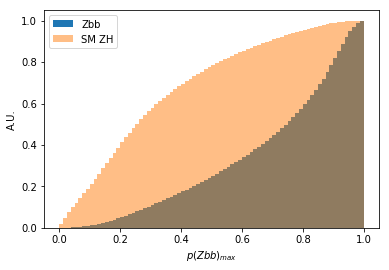

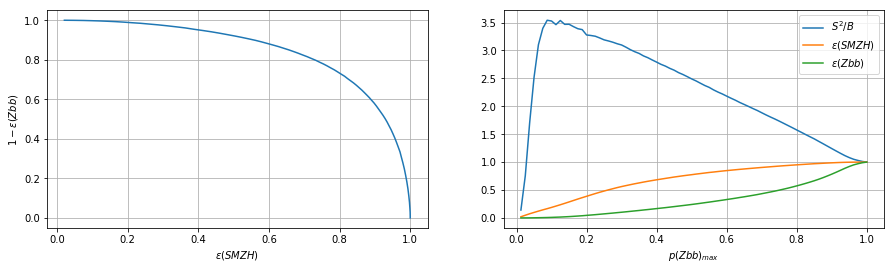

In [8]:
Zbb_probB_sm, SMVh_probB_sm, bins_sm = bkg_reject(Zbb,SMVh,'opt_sm_prob1')

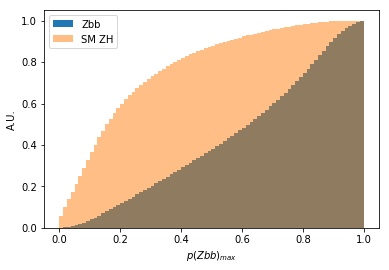

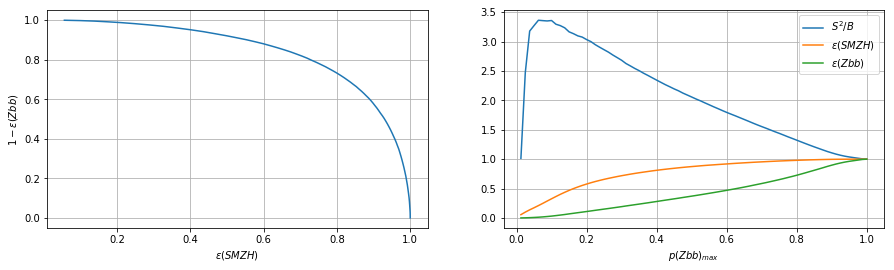

In [9]:
Zbb_probB_bsm1, SMVh_probB_bsm1, bins_bsm1 = bkg_reject(Zbb,SMVh,'opt_bsm1_prob2')

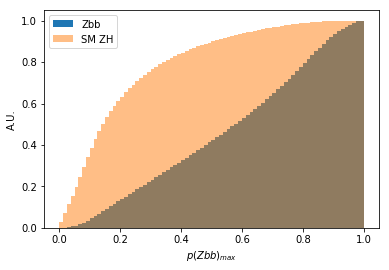

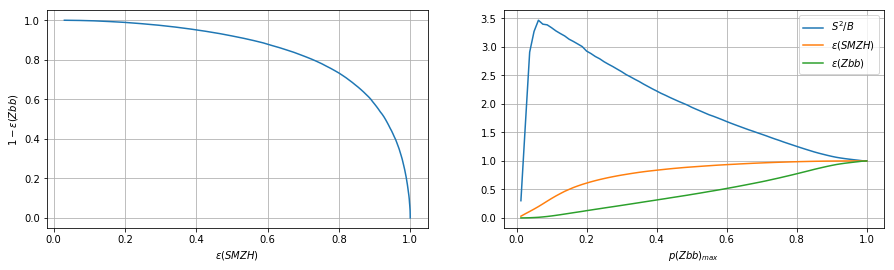

In [10]:
Zbb_probB_bsm2, SMVh_probB_bsm2, bins_bsm2 = bkg_reject(Zbb,SMVh,'opt_bsm2_prob2')

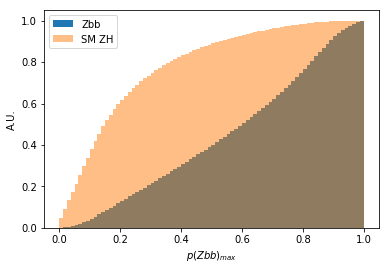

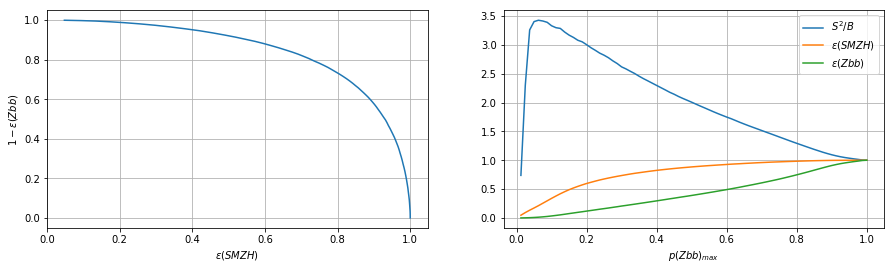

In [11]:
Zbb_probB_bsm3, SMVh_probB_bsm3, bins_bsm3 = bkg_reject(Zbb,SMVh,'opt_bsm3_prob2')

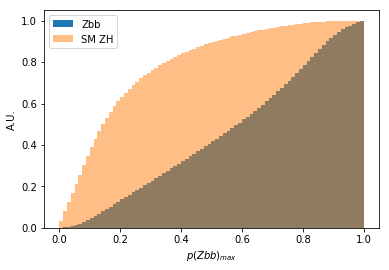

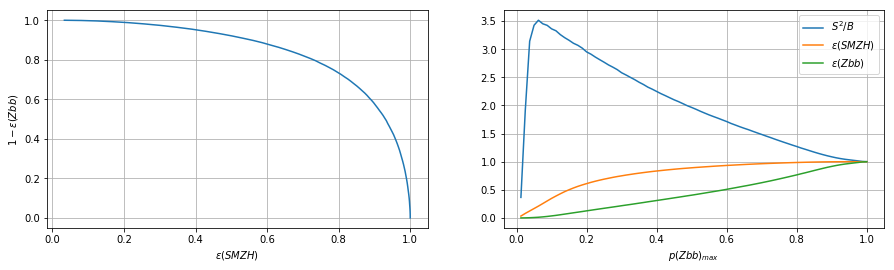

In [12]:
Zbb_probB_bsm4, SMVh_probB_bsm4, bins_bsm4 = bkg_reject(Zbb,SMVh,'opt_bsm4_prob2')

In [29]:
def bsm_analysis(Zbb,SMVh,BSM,bkg_column,bkg_cut,bsm_column,sm_column):
    selZbb = Zbb[ Zbb[bkg_column] < bkg_cut  ]
    selSMVh = SMVh[ SMVh[bkg_column] < bkg_cut  ]
    selBSM = BSM[ BSM[bkg_column] < bkg_cut  ]
    
    plt.hist(selZbb[bsm_column],bins=50,range=[0,1],weights=selZbb.wgt,normed=True,label='Zbb')
    plt.hist(selSMVh[bsm_column],bins=50,range=[0,1],weights=selSMVh.wgt,normed=True,label='SM ZH',alpha=0.5)
    plt.hist(selBSM[bsm_column],bins=50,range=[0,1],weights=selBSM.wgt,normed=True,label='BSM',alpha=0.5)
    
    plt.legend()
    plt.show()

    plt.hist(selZbb[sm_column],bins=50,range=[0,1],weights=selZbb.wgt,normed=True,label='Zbb')
    plt.hist(selSMVh[sm_column],bins=50,range=[0,1],weights=selSMVh.wgt,normed=True,label='SM ZH',alpha=0.5)
    plt.hist(selBSM[sm_column],bins=50,range=[0,1],weights=selBSM.wgt,normed=True,label='BSM',alpha=0.5)
    
    plt.legend()
    plt.show()

    _, bins, _ = plt.hist(selZbb[bsm_column]/(selZbb[sm_column]+selZbb[bsm_column]),range=[0,1],bins=100,weights=selZbb.wgt,normed=True,label='Zbb')
    _, bins, _ = plt.hist(selSMVh[bsm_column]/(selSMVh[sm_column]+selSMVh[bsm_column]),bins=bins,weights=selSMVh.wgt,normed=True,label='SM ZH',alpha=0.5)
    _, bins, _ = plt.hist(selBSM[bsm_column]/(selBSM[sm_column]+selBSM[bsm_column]),bins=bins,weights=selBSM.wgt,normed=True,label='BSM',alpha=0.5)
    
    plt.legend()
    plt.show()

#     plt.scatter(selZbb[bsm_column],selZbb[sm_column],label='Zbb',color='blue')
#     plt.scatter(selSMVh[bsm_column],selSMVh[sm_column],label='SM ZH',alpha=0.2,color='orange')
#     plt.scatter(selBSM[bsm_column],selBSM[sm_column],label='BSM',alpha=0.2,color='green',style='o')
    
#     plt.legend()
#     plt.show()

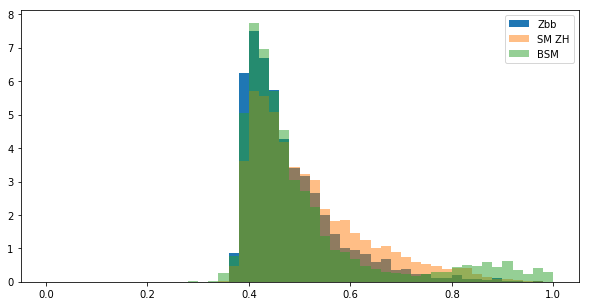

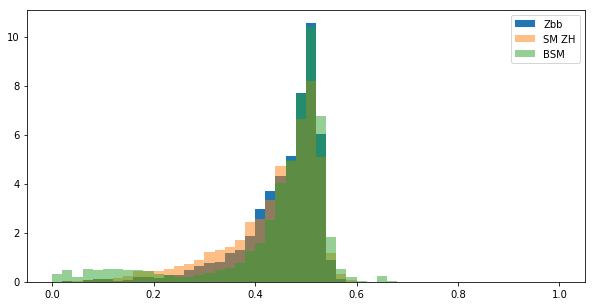

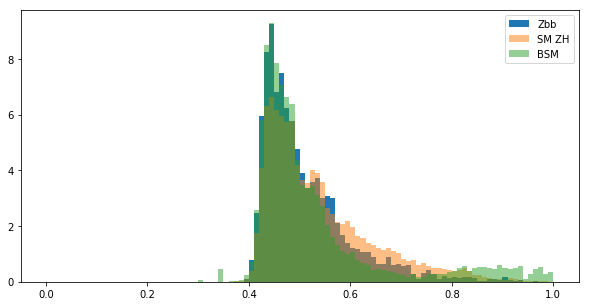

In [30]:
bsm_analysis(Zbb,SMVh,cHWp,'opt_bsm1_prob2',0.1,'opt_bsm1_prob0','opt_bsm1_prob1')

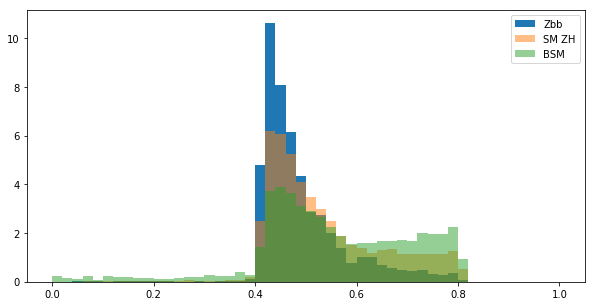

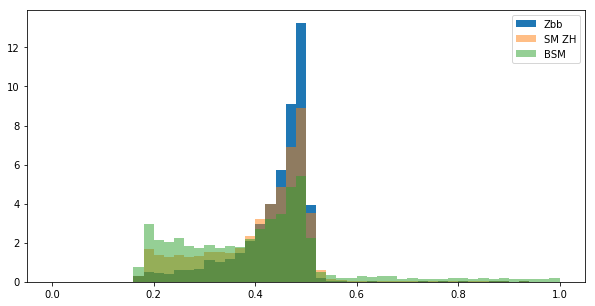

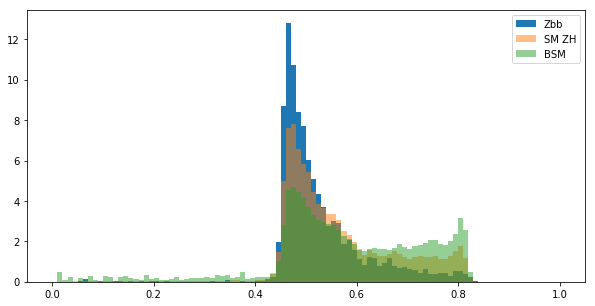

In [33]:
bsm_analysis(Zbb,SMVh,cHWm,'opt_bsm2_prob2',0.1,'opt_bsm2_prob1','opt_bsm2_prob0')

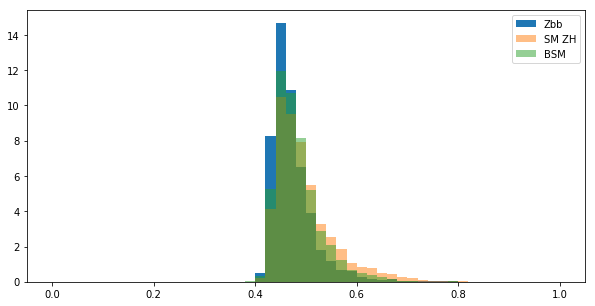

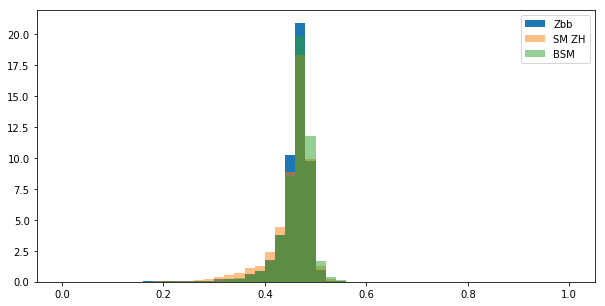

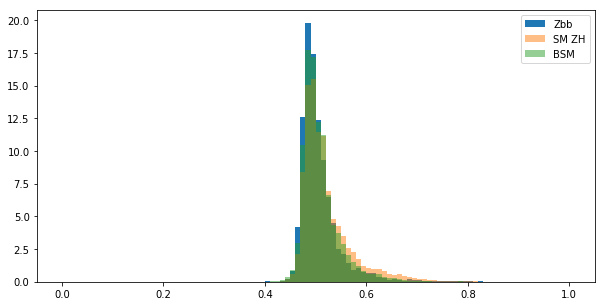

In [35]:
bsm_analysis(Zbb,SMVh,cHWp1,'opt_bsm3_prob2',0.1,'opt_bsm3_prob0','opt_bsm3_prob1')

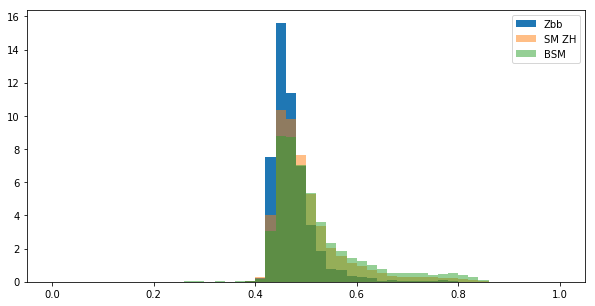

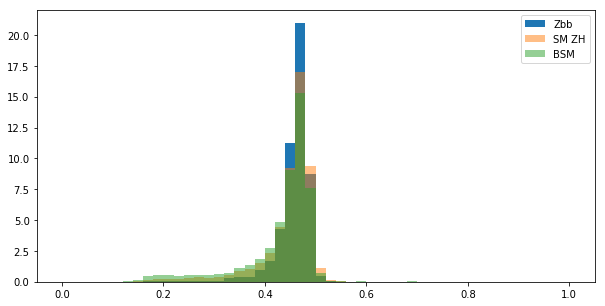

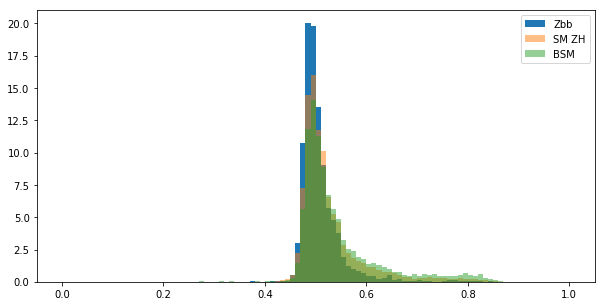

In [36]:
bsm_analysis(Zbb,SMVh,cHWm1,'opt_bsm4_prob2',0.1,'opt_bsm4_prob1','opt_bsm4_prob0')

In [40]:
# bsm_analysis(Zbb,SMVh,cHWm1,'opt_bsm2_prob2',0.1,'opt_bsm2_prob1','opt_bsm2_prob0')

In [39]:
# bsm_analysis(Zbb,SMVh,cHWm,'opt_bsm4_prob2',0.1,'opt_bsm4_prob1','opt_bsm4_prob0')

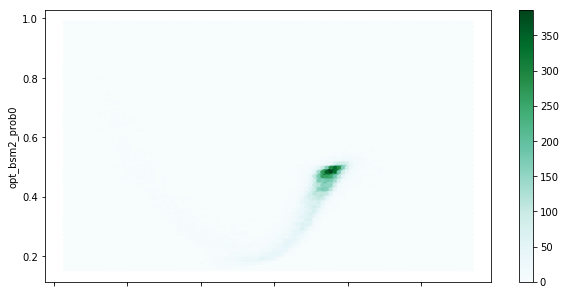

In [44]:
cHWm[cHWm.opt_bsm2_prob2 < 0.1].plot.hexbin('opt_bsm4_prob0','opt_bsm2_prob0')

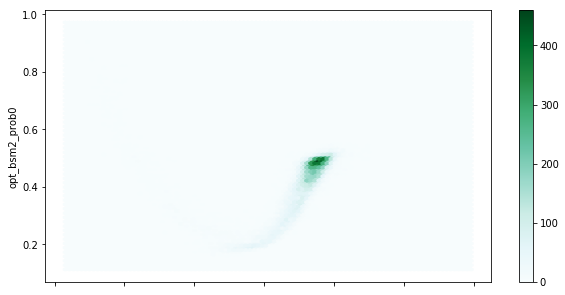

In [46]:
cHWm1[cHWm1.opt_bsm2_prob2 < 0.1].plot.hexbin('opt_bsm4_prob0','opt_bsm2_prob0')

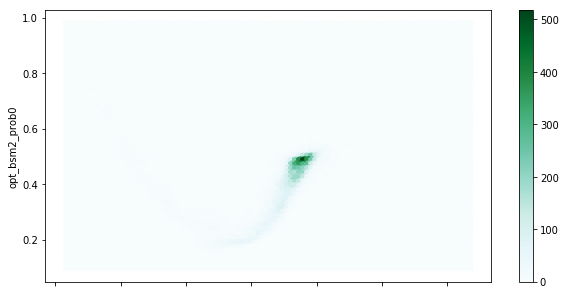

In [47]:
SMVh[SMVh.opt_bsm2_prob2 < 0.1].plot.hexbin('opt_bsm4_prob0','opt_bsm2_prob0')

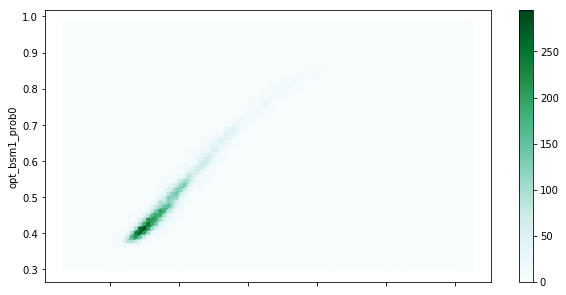

In [49]:
cHWp[cHWp.opt_bsm3_prob2 < 0.1].plot.hexbin('opt_bsm3_prob0','opt_bsm1_prob0')

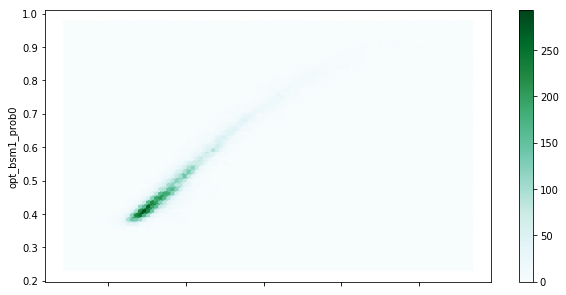

In [50]:
cHWp1[cHWp1.opt_bsm3_prob2 < 0.1].plot.hexbin('opt_bsm3_prob0','opt_bsm1_prob0')

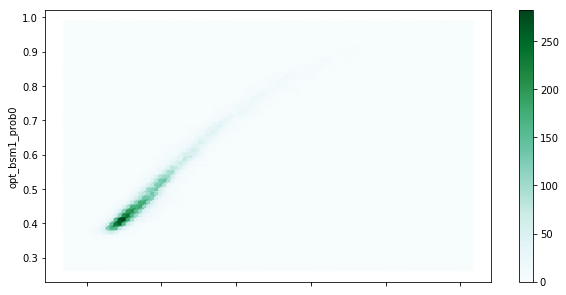

In [51]:
SMVh[SMVh.opt_bsm3_prob2 < 0.1].plot.hexbin('opt_bsm3_prob0','opt_bsm1_prob0')